In [14]:
import pandas as pd
import numpy as np


df = pd.read_csv("gene_expression.csv")


X_raw = df["Gene One"].to_numpy()
y = df["Cancer"].to_numpy()

X = X_raw.reshape(-1, 1)

print("X shape:", X)
print("y shape:", y)


X shape: [[4.3]
 [2.5]
 [5.7]
 ...
 [2.7]
 [3.3]
 [4.6]]
y shape: [1 0 1 ... 0 0 0]


In [16]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0)

clf.fit(X, y)


threshold = -clf.intercept_[0] / clf.coef_[0][0]
print(f"The cutoff value is Gene Expression = {threshold}")

The cutoff value is Gene Expression = 5.650004594925064


In [17]:
correct = 0

for i in range(len(X)):
    x_value = X[i][0]   # because X is (n,1)
    
    # Manual prediction
    if x_value > threshold:
        y_pred = 1
    else:
        y_pred = 0
    
    # Check correctness
    if y_pred == y[i]:
        correct += 1

accuracy = correct / len(X)

print("Manual Accuracy:", accuracy)


Manual Accuracy: 0.6716666666666666


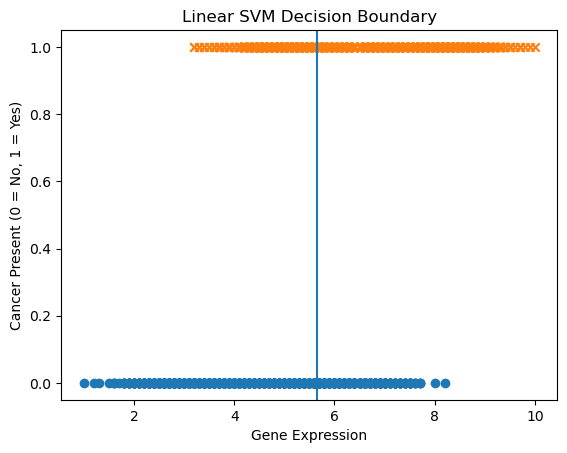

In [19]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(X[y==0], y[y==0], marker='o')
plt.scatter(X[y==1], y[y==1], marker='x')

# Draw decision boundary (vertical line)
plt.axvline(x=threshold)

# Labels
plt.xlabel("Gene Expression")
plt.ylabel("Cancer Present (0 = No, 1 = Yes)")
plt.title("Linear SVM Decision Boundary")

plt.show()


In [20]:

X_squared = (X.flatten() ** 2).reshape(-1, 1)



clf = SVC(kernel='linear', C=1.0)
clf.fit(X_squared, y)



threshold = -clf.intercept_[0] / clf.coef_[0][0]

print("New cutoff in x^2 space:", threshold)

correct = 0
total = len(X)

for x_value, true_label in zip(X.flatten(), y):
    
    # Square the feature
    x_squared = x_value ** 2
    
    # Manual prediction in x^2 space
    predicted_label = 1 if x_squared > threshold else 0
    
    # Count correct predictions
    if predicted_label == true_label:
        correct += 1

accuracy = correct / total

print("Manual Accuracy (x^2):", accuracy)


New cutoff in x^2 space: 34.98425164707155
Manual Accuracy (x^2): 0.676
